## Load Libraries

In [4]:
import os
os.chdir('../..')
os.getcwd()

'/workspace/data/brail_poc'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from mne import Epochs, find_events
import mne
import glob

from mne import find_events

plt.rcParams['figure.figsize'] = 14, 4 
from notebooks.kapel.preproc import data_extract,set_info, bp_filter, epochs_gen

## Load Data

In [11]:
data = pd.read_csv("eeg_data/DSI_streamer/DSI-24_AEP_Sample_v_0.7.34_raw.csv", 
                   skiprows=14, usecols = [*range(1,26)]) 

trigger = data[["Trigger"]]
eeg_df = data.drop(['CM', 'M1', 'S17', 'S18', 'S21', 'Trigger'], axis = 1)

channel_names = ['P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 
                 'Cz', 'FP1', 'FP2', 'T3', 'T5', 
                 'O1', 'O2', 'F7', 'F8', 'M2', 'T6', 'T4']


In [13]:
eeg_df

P3     C3     F3     Fz     F4     C4    P4     Cz    Fp1    Fp2  \
0     -228.0 -180.9 -253.5 -213.6 -195.6 -100.8 -96.0 -143.7 -136.5 -268.2   
1     -142.8 -105.3 -190.2 -145.2 -126.9  -33.3 -21.0  -68.7  -84.3 -209.7   
2     -135.0 -136.2 -212.4 -170.4 -171.6  -60.0 -62.1 -105.3 -140.4 -264.6   
3     -192.6 -131.7 -221.7 -177.6 -159.3  -66.0 -58.2 -103.8  -93.9 -218.1   
4     -156.6 -135.0 -217.5 -175.5 -165.6  -63.6 -62.4 -102.0 -132.3 -259.8   
...      ...    ...    ...    ...    ...    ...   ...    ...    ...    ...   
61324  -27.3    0.6   80.1  -27.6  -39.3  -45.0  42.0   24.3  124.5   30.3   
61325  -69.3  -60.9   22.2  -89.1 -103.5 -104.7 -17.1  -36.9   66.6  -27.6   
61326 -103.5  -33.6   41.4  -77.4  -74.7  -96.0   4.5  -15.0  127.5   23.1   
61327  -39.6  -35.4   45.0  -64.8  -75.3  -80.7   9.3  -12.3   76.2  -17.1   
61328  -54.9  -19.2   60.3  -56.1  -64.8  -74.7  15.3   -4.8  132.0   23.1   

          T3     T5     O1     O2     F7     F8      M2     T6     T4  
0     -111.3 -122.7  234.3  128.4 -185.1 -331.5 -3334.5  -86.1  -91.8  
1      -47.7    0.9  312.3  210.6 -135.6 -278.1 -3283.2    2.7  -18.9  
2      -48.0  -35.7  267.6  177.3 -159.6 -291.0 -3323.1  -31.5  -35.7  
3      -71.4  -64.2  264.3  170.1 -153.3 -298.5 -3283.5  -45.3  -57.0  
4      -62.1  -33.9  281.7  181.8 -166.8 -306.0 -3324.0  -25.5  -53.1  
...      ...    ...    ...    ...    ...    ...     ...    ...    ...  
61324  -22.5    6.3  -96.0  -60.9  177.6   -0.3   -36.6  -40.2  -72.3  
61325  -70.2  -37.8 -133.5 -113.7  130.2  -45.3  -113.7 -104.1 -144.3  
61326  -56.1  -60.3 -127.2  -96.6  165.9  -49.2   -77.1  -96.0 -124.5  
61327  -48.6   -3.9 -125.7  -93.6  139.5  -29.7  -101.7  -85.5 -120.3  
61328  -41.1  -12.6 -111.6 -110.1  169.2  -11.1   -58.8  -78.3 -107.7  

[61329 rows x 19 columns]

In [12]:
eeg_df.transpose()

0       1       2       3       4       5       6       7       8      \
P3   -228.0  -142.8  -135.0  -192.6  -156.6  -119.7  -230.7  -111.6  -168.9   
C3   -180.9  -105.3  -136.2  -131.7  -135.0  -115.8  -168.6  -106.5  -130.8   
F3   -253.5  -190.2  -212.4  -221.7  -217.5  -192.6  -259.8  -192.3  -214.5   
Fz   -213.6  -145.2  -170.4  -177.6  -175.5  -152.4  -221.4  -146.7  -171.0   
F4   -195.6  -126.9  -171.6  -159.3  -165.6  -147.9  -194.4  -135.3  -153.0   
C4   -100.8   -33.3   -60.0   -66.0   -63.6   -38.1   -99.9   -27.0   -48.0   
P4    -96.0   -21.0   -62.1   -58.2   -62.4   -39.6   -92.4   -26.7   -52.2   
Cz   -143.7   -68.7  -105.3  -103.8  -102.0   -77.7  -132.0   -63.0   -88.5   
Fp1  -136.5   -84.3  -140.4   -93.9  -132.3  -103.5  -129.6  -113.1   -99.9   
Fp2  -268.2  -209.7  -264.6  -218.1  -259.8  -233.4  -256.2  -242.1  -229.2   
T3   -111.3   -47.7   -48.0   -71.4   -62.1   -36.0   -95.4     6.3   -48.9   
T5   -122.7     0.9   -35.7   -64.2   -33.9    -6.0   -86.7     3.6   -49.5   
O1    234.3   312.3   267.6   264.3   281.7   312.3   226.2   310.8   258.6   
O2    128.4   210.6   177.3   170.1   181.8   201.6   130.2   222.9   170.4   
F7   -185.1  -135.6  -159.6  -153.3  -166.8  -133.5  -192.9  -142.2  -147.0   
F8   -331.5  -278.1  -291.0  -298.5  -306.0  -270.0  -339.6  -264.6  -267.0   
M2  -3334.5 -3283.2 -3323.1 -3283.5 -3324.0 -3288.6 -3314.7 -3290.1 -3277.2   
T6    -86.1     2.7   -31.5   -45.3   -25.5    -5.1   -77.1    -4.8   -22.5   
T4    -91.8   -18.9   -35.7   -57.0   -53.1   -38.1   -78.0   -13.8   -30.3   

      9      ...  61319  61320  61321  61322  61323  61324  61325  61326  \
P3   -232.5  ...   32.1 -147.3  -48.9  -32.1 -128.4  -27.3  -69.3 -103.5   
C3   -174.3  ...   39.0  -97.5   -0.3  -23.7  -67.5    0.6  -60.9  -33.6   
F3   -263.1  ...  125.7   -8.4   80.1   63.9    8.1   80.1   22.2   41.4   
Fz   -219.9  ...   14.1 -126.3  -35.7  -45.9 -105.3  -27.6  -89.1  -77.4   
F4   -191.1  ...  -10.5 -137.7  -43.5  -69.9 -106.2  -39.3 -103.5  -74.7   
C4    -93.6  ...  -13.2 -149.4  -54.9  -72.6 -125.7  -45.0 -104.7  -96.0   
P4    -91.2  ...   64.8  -66.3   33.0    9.9  -31.2   42.0  -17.1    4.5   
Cz   -130.2  ...   44.7  -83.4   14.4   -8.4  -53.4   24.3  -36.9  -15.0   
Fp1  -143.1  ...  156.9   65.4  140.7   98.4  101.4  124.5   66.6  127.5   
Fp2  -273.0  ...   53.7  -44.4   36.3   -7.5   -0.6   30.3  -27.6   23.1   
T3   -118.5  ...   29.4 -121.8  -24.3  -15.0 -113.4  -22.5  -70.2  -56.1   
T5    -84.9  ...   71.4 -100.5    8.7  -19.8  -49.2    6.3  -37.8  -60.3   
O1    225.9  ...  -35.7 -185.7 -100.5 -101.4 -159.3  -96.0 -133.5 -127.2   
O2    137.1  ...  -16.5 -165.6  -70.5  -79.2 -147.0  -60.9 -113.7  -96.6   
F7   -191.4  ...  224.7  109.2  182.4  165.6  131.7  177.6  130.2  165.9   
F8   -336.9  ...   55.5  -89.7   -8.4   -6.3  -60.0   -0.3  -45.3  -49.2   
M2  -3318.6  ...  -15.6  -96.3  -18.3  -61.5  -66.9  -36.6 -113.7  -77.1   
T6    -63.3  ...   -9.9 -150.9  -51.9  -68.1 -120.3  -40.2 -104.1  -96.0   
T4    -75.9  ...  -42.9 -171.6  -85.8 -104.7 -146.1  -72.3 -144.3 -124.5   

     61327  61328  
P3   -39.6  -54.9  
C3   -35.4  -19.2  
F3    45.0   60.3  
Fz   -64.8  -56.1  
F4   -75.3  -64.8  
C4   -80.7  -74.7  
P4     9.3   15.3  
Cz   -12.3   -4.8  
Fp1   76.2  132.0  
Fp2  -17.1   23.1  
T3   -48.6  -41.1  
T5    -3.9  -12.6  
O1  -125.7 -111.6  
O2   -93.6 -110.1  
F7   139.5  169.2  
F8   -29.7  -11.1  
M2  -101.7  -58.8  
T6   -85.5  -78.3  
T4  -120.3 -107.7  

[19 rows x 61329 columns]

In [24]:
trigger

Trigger
0            0
1            0
2            0
3            0
4            0
...        ...
61324        0
61325        0
61326        0
61327        0
61328        0

[61329 rows x 1 columns]

In [25]:
sfreq = 300
info = mne.create_info(ch_names = channel_names, sfreq = sfreq)
info

<Info | 7 non-empty values
 bads: []
 ch_names: P3, C3, F3, Fz, F4, C4, P4, Cz, FP1, FP2, T3, T5, O1, O2, F7, ...
 chs: 19 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 150.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 300.0 Hz
>

Creating RawArray with float64 data, n_channels=19, n_times=61329
    Range : 0 ... 61328 =      0.000 ...   204.427 secs
Ready.
Opening raw-browser...


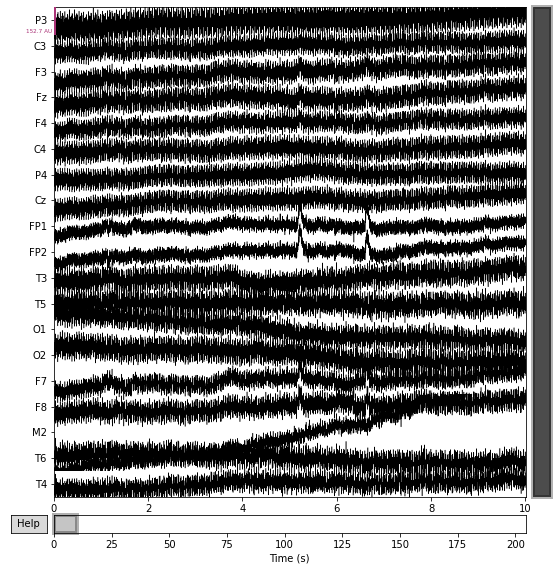

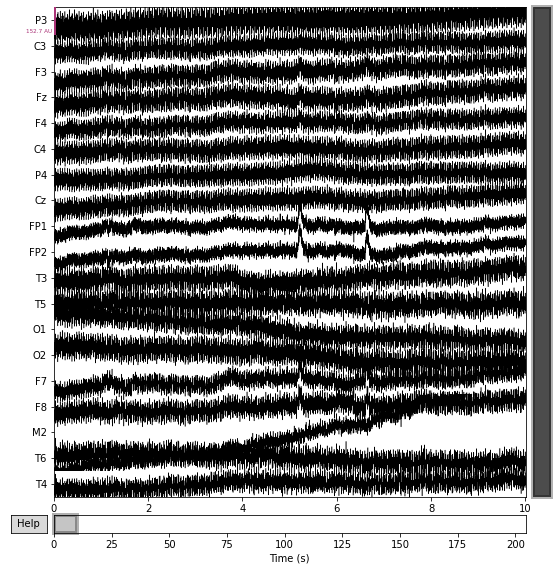

In [27]:
raw = mne.io.RawArray(eeg_df.transpose(), info)
raw.plot()

## Plot Y values

<Figure size 1008x288 with 0 Axes>

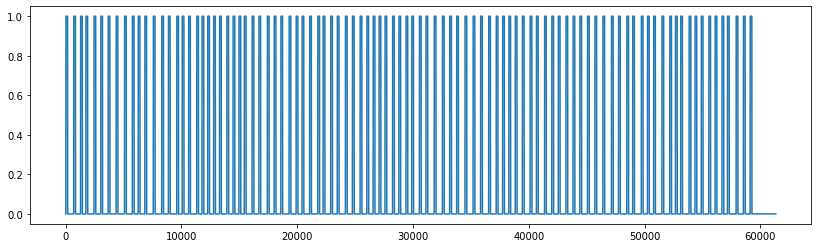

<Figure size 1008x288 with 0 Axes>

In [29]:
plt.plot(trigger)
plt.figure()

## Plot raw data

Opening raw-browser...


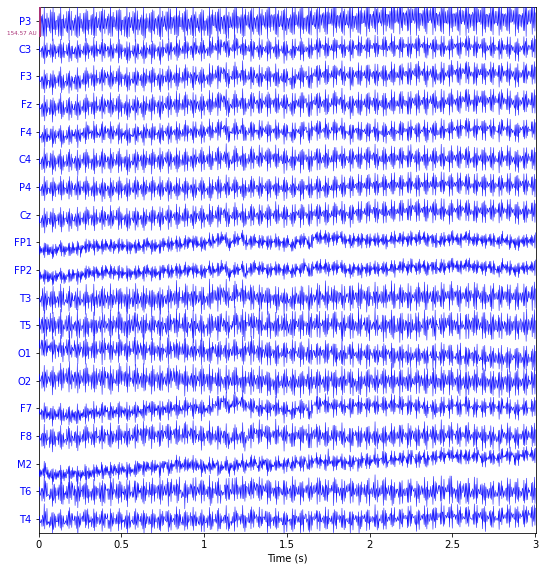

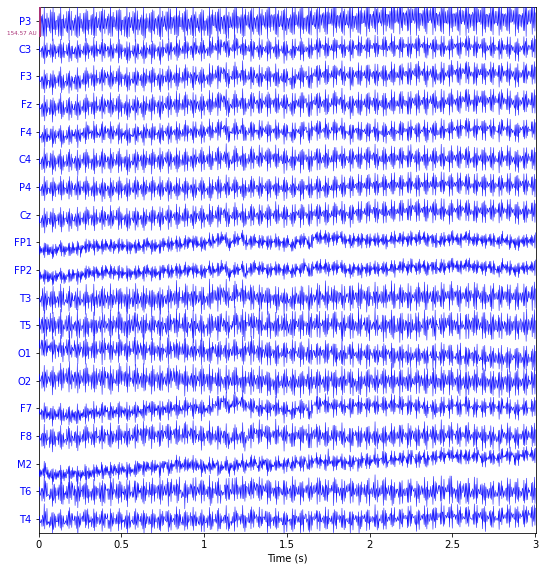

In [30]:
raw.plot(color = 'blue', scalings= 'auto', duration =3, start = 0, 
         title = "Raw EEG signals", show_scalebars=True, show_scrollbars=False)

## Filter and Epochs generation

In [31]:
X = eeg_df.to_numpy()
channels = eeg_df.columns.to_list()
y = trigger.to_numpy()

In [33]:
info = mne.create_info(channels, sfreq, ch_types=['eeg']*19)
raw = mne.io.RawArray(X.T, info)

#montage = mne.channels.read_montage(kind= )
#About montage:
#https://mne.tools/0.11/generated/mne.channels.read_montage.html
#raw.set_montage("standard_alphabetic")
raw

Creating RawArray with float64 data, n_channels=19, n_times=61329
    Range : 0 ... 61328 =      0.000 ...   204.427 secs
Ready.


<RawArray | 19 x 61329 (204.4 s), ~8.9 MB, data loaded>

In [34]:
raw.set_montage("standard_alphabetic")

<RawArray | 19 x 61329 (204.4 s), ~8.9 MB, data loaded>

In [36]:
info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
stim_raw = mne.io.RawArray(np.reshape(y, (-1, 1)).T, info)
raw.add_channels([stim_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=61329
    Range : 0 ... 61328 =      0.000 ...   204.427 secs
Ready.


<RawArray | 20 x 61329 (204.4 s), ~9.4 MB, data loaded>

In [37]:
filt_raw = raw.copy().filter(0.1, 30, picks='eeg', method='iir', 
                             iir_params=dict(order=8, ftype='butter'), 
                             verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 32 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB



Opening raw-browser...


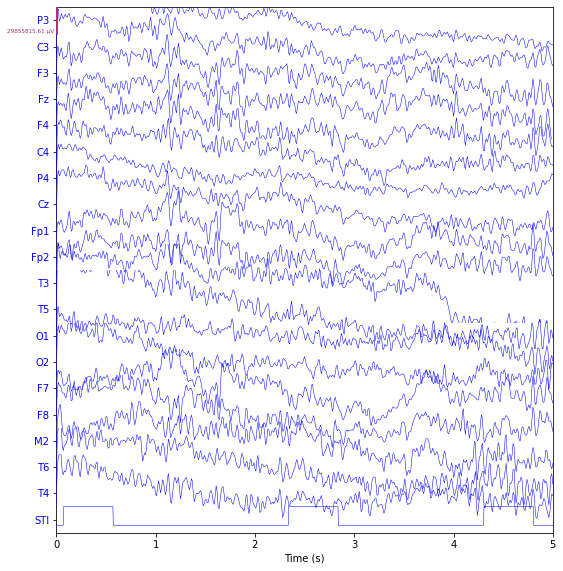

In [102]:
filt_raw.plot(color = 'blue', scalings= 'auto', duration =5, start = 0, 
         title = "Raw EEG signals", show_scalebars=True, show_scrollbars=False);

In [39]:
events = find_events(filt_raw)
events

98 events found
Event IDs: [1]


array([[   22,     0,     1],
       [  702,     0,     1],
       [ 1292,     0,     1],
       [ 1752,     0,     1],
       [ 2450,     0,     1],
       [ 3036,     0,     1],
       [ 3673,     0,     1],
       [ 4363,     0,     1],
       [ 5089,     0,     1],
       [ 5764,     0,     1],
       [ 6270,     0,     1],
       [ 6842,     0,     1],
       [ 7573,     0,     1],
       [ 8300,     0,     1],
       [ 8877,     0,     1],
       [ 9599,     0,     1],
       [10067,     0,     1],
       [10625,     0,     1],
       [11324,     0,     1],
       [11778,     0,     1],
       [12270,     0,     1],
       [12781,     0,     1],
       [13292,     0,     1],
       [13925,     0,     1],
       [14460,     0,     1],
       [14970,     0,     1],
       [15430,     0,     1],
       [16105,     0,     1],
       [16691,     0,     1],
       [17422,     0,     1],
       [18013,     0,     1],
       [18589,     0,     1],
       [19297,     0,     1],
       [19

In [40]:
def epochs_gen(filt_raw, event_id=dict(T=1), 
               tmin=-0.2, tmax=0.8, picks='eeg'):
  
    events = find_events(filt_raw)
    epochs = Epochs(filt_raw, events, event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs


epochs = epochs_gen(filt_raw)

98 events found
Event IDs: [1]
Not setting metadata
98 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 98 events and 301 original time points ...
1 bad epochs dropped


In [41]:
epochs

<Epochs |  97 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~4.3 MB, data loaded,
 'T': 97>

In [59]:
def set_ianfo(X, channels, sfreq=256):
    
    info = mne.create_info(channels, sfreq, ch_types=['eeg']*21)
    raw = mne.io.RawArray(X.T, info)
    raw.set_montage("standard_1020")
    
    return raw

def add_stim(raw, y):
    info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
    stim_raw = mne.io.RawArray(np.reshape(y, (-1, 1)).T, info)
    raw.add_channels([stim_raw], force_update_info=True)
    
    return raw

def bp_filter(X, y, channels, f_low=0.1, f_high=30, picks='eeg', 
              iir_params= dict(order=8, ftype='butter')):
    
    raw = set_info(X, channels, sfreq=256)
    raw = add_stim(raw, y)
    filt_raw = raw.copy().filter(f_low, f_high, picks=picks, method='iir', 
                                 iir_params=iir_params, verbose=True)
    return filt_raw

def epochs_gen(filt_raw, event_id=dict(NT=0, T=1), 
               tmin=-0.2, tmax=0.8, picks='eeg'):
  
    events = find_events(filt_raw)
    epochs = Epochs(filt_raw, events, event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs


## Event matrix

98 events found
Event IDs: [1]


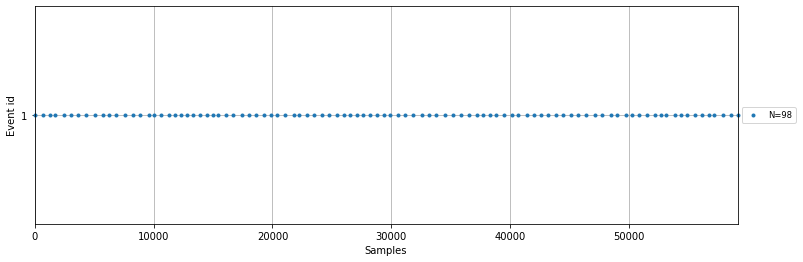

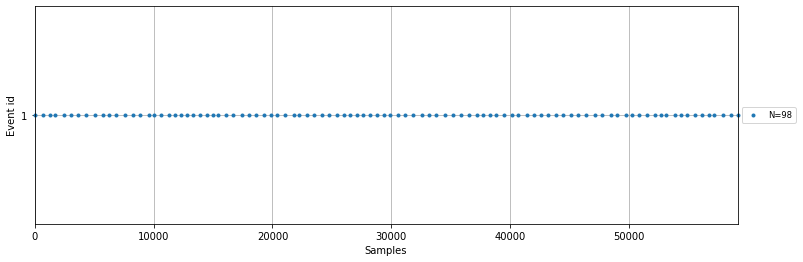

In [42]:
events = find_events(filt_raw)
mne.viz.plot_events(events)

## Plot filtered data with events

In [43]:
epochs

<Epochs |  97 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~4.3 MB, data loaded,
 'T': 97>

Opening epochs-browser...


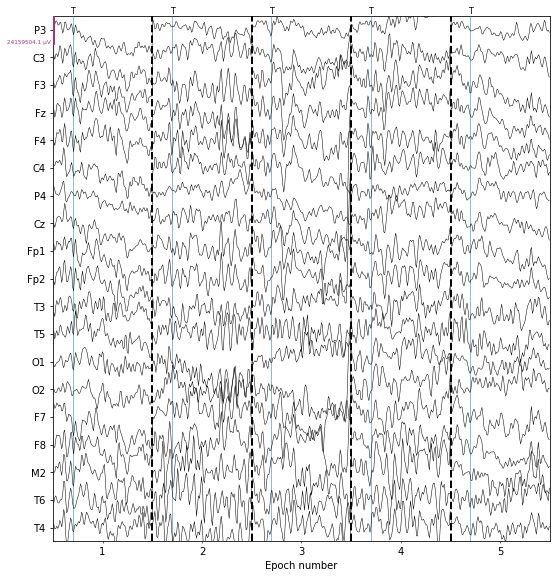

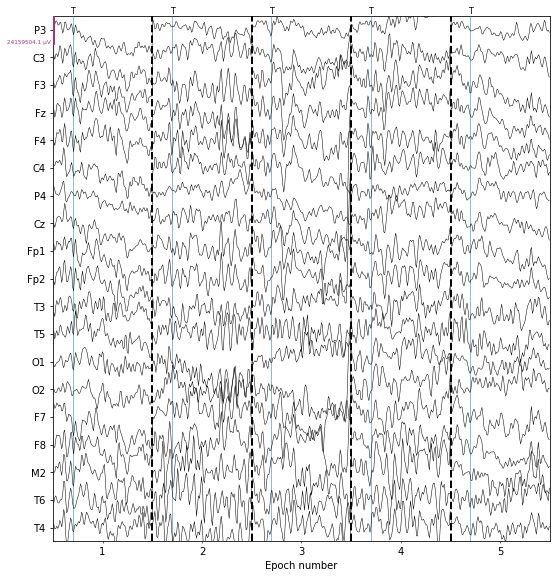

In [71]:

epochs.plot(picks='eeg', show_scrollbars=False, events = events,
                      event_id=dict(T = 1), n_epochs = 5,  scalings = 'auto')

# Butterfly plot

Opening epochs-browser...


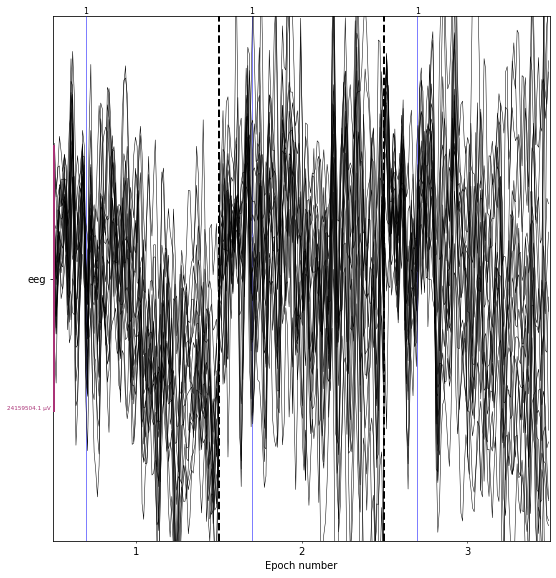

In [101]:
mne.viz.plot_epochs(epochs, picks='eeg', show_scrollbars=False, events = events,
                    n_epochs = 3, scalings = 'auto', butterfly = True,
                   event_color = {1 : 'blue'});

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/3143394281.py:1: RuntimeWarning: Only one channel in group "P3"; cannot combine by method "mean".
  epochs['T'].plot_image(picks=channels[0], combine='mean');
/tmp/ipykernel_563/3143394281.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs['T'].plot_image(picks=channels[0], combine='mean');


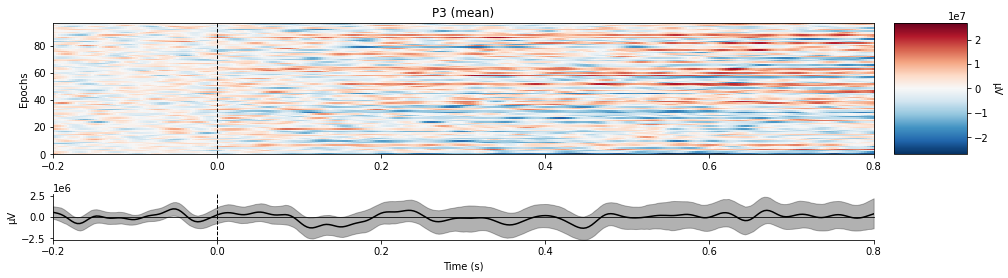

In [100]:
epochs['T'].plot_image(picks=channels[0], combine='mean');

## Epochs Image Plots
## Non Target image plot

## Target image plot

In [48]:
channels

['P3',
 'C3',
 'F3',
 'Fz',
 'F4',
 'C4',
 'P4',
 'Cz',
 'Fp1',
 'Fp2',
 'T3',
 'T5',
 'O1',
 'O2',
 'F7',
 'F8',
 'M2',
 'T6',
 'T4']

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "P3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


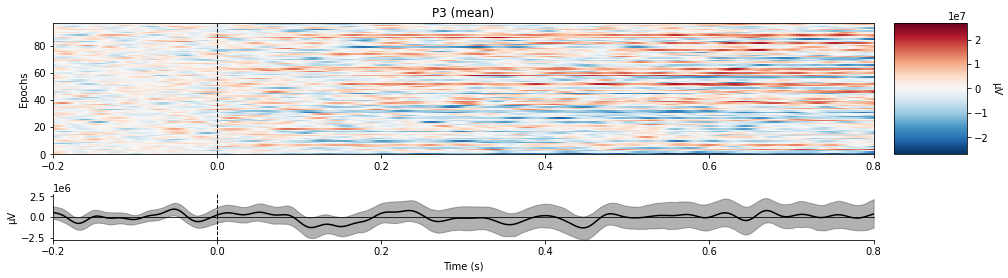

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "C3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


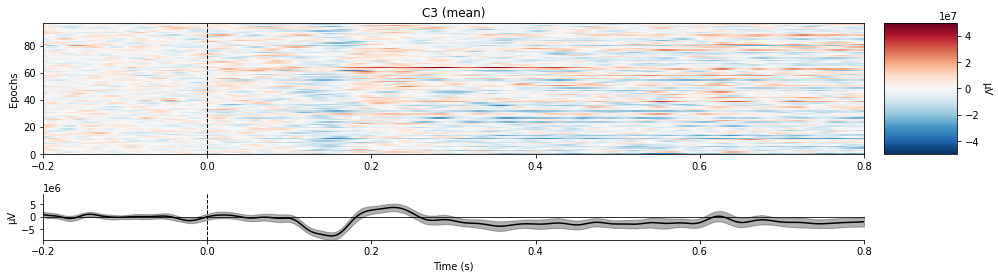

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "F3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


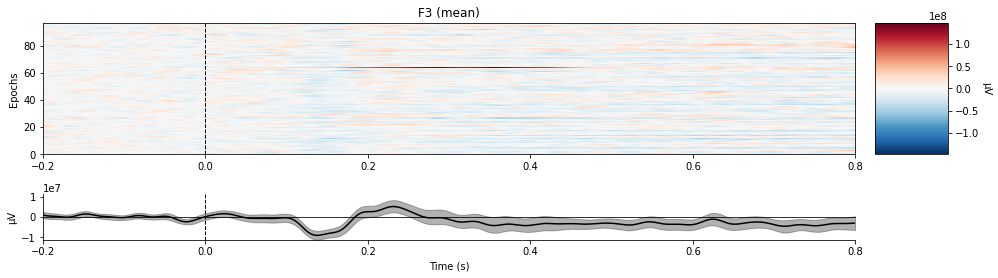

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "Fz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


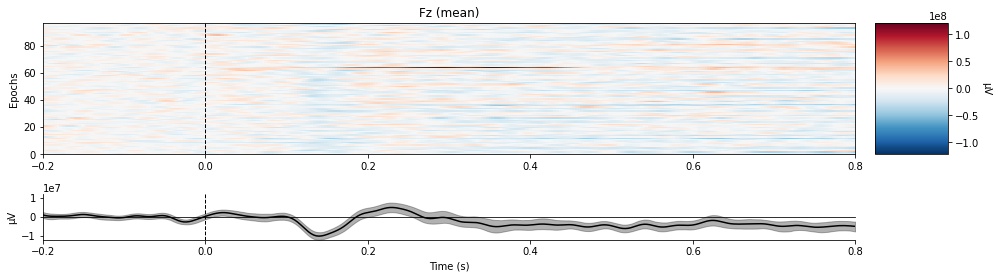

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "F4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


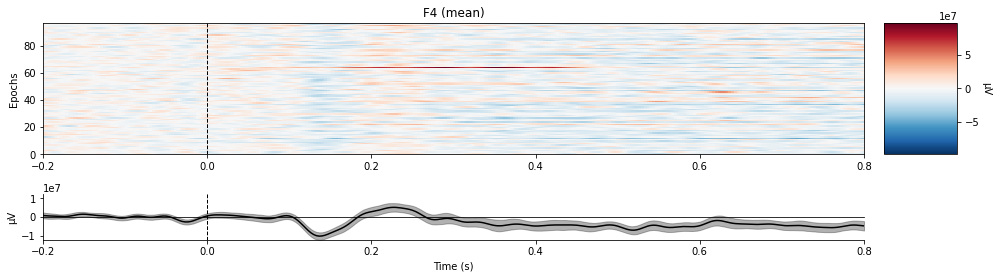

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "C4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


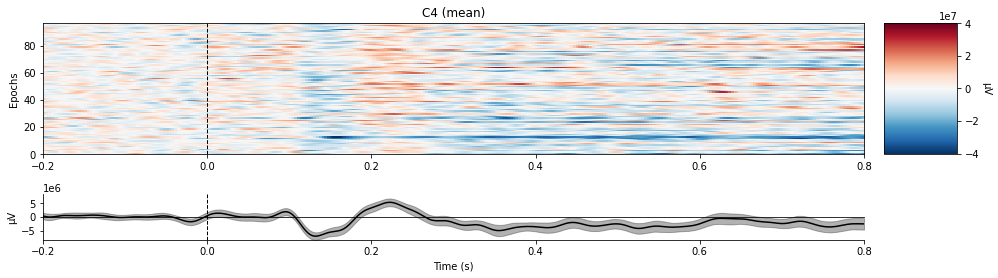

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "P4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


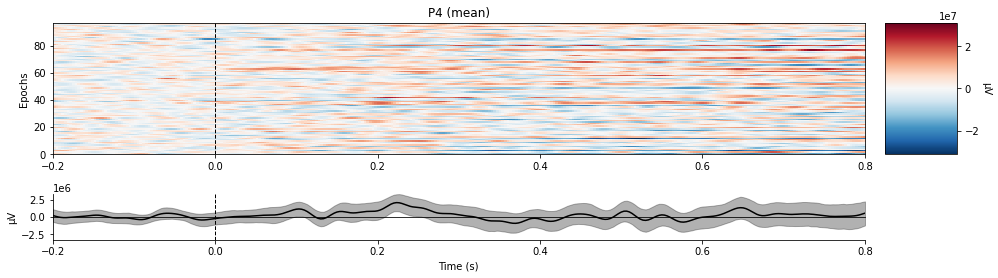

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "Cz"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


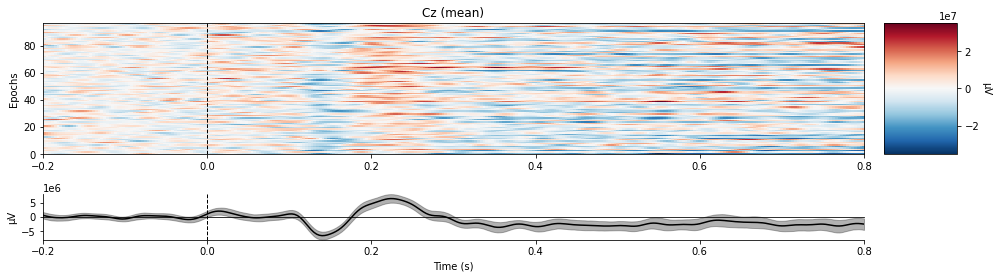

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "Fp1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


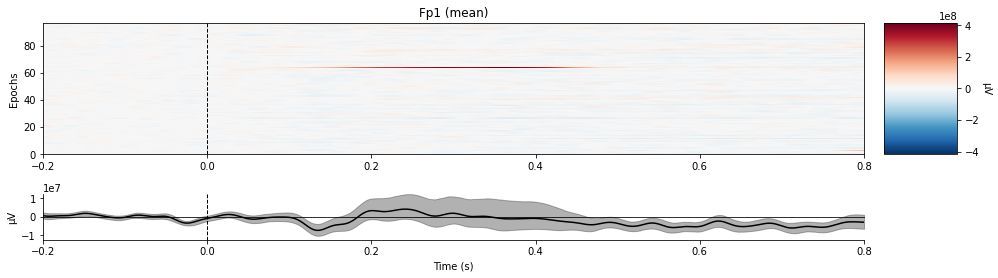

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "Fp2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


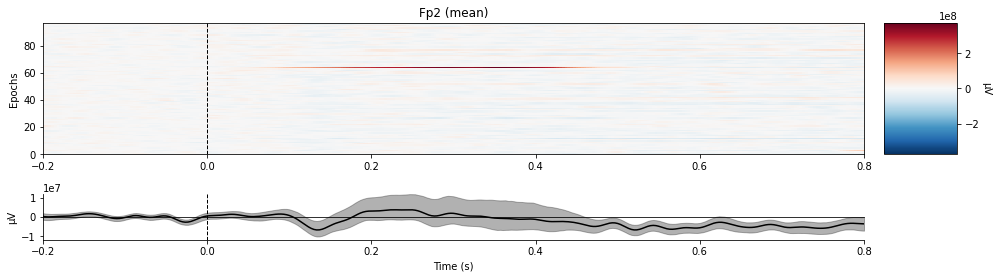

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "T3"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


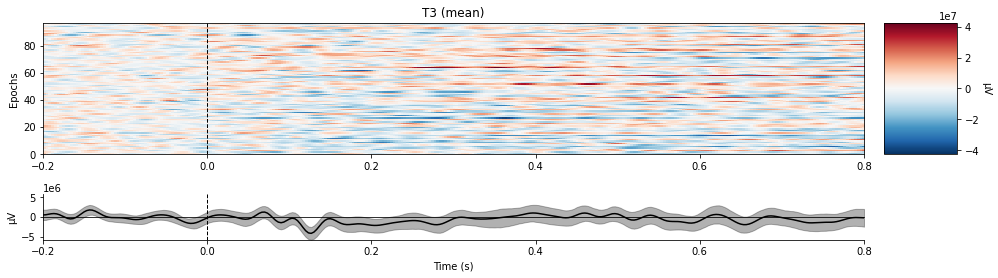

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "T5"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


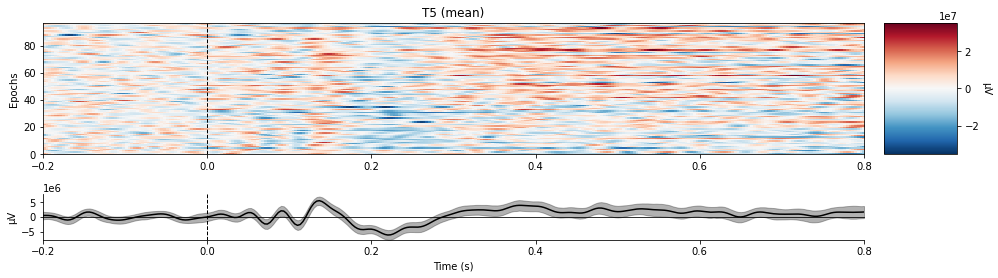

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "O1"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


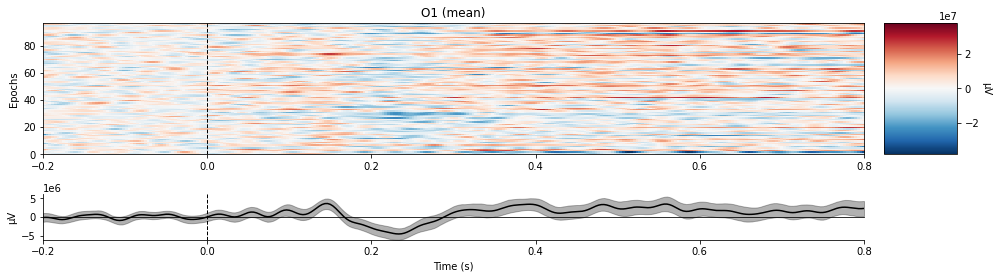

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "O2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


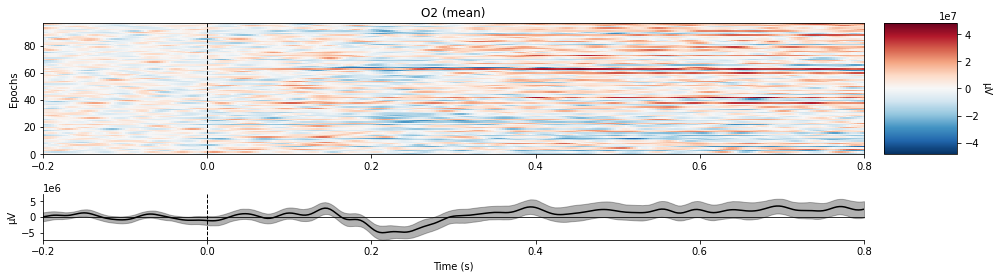

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "F7"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


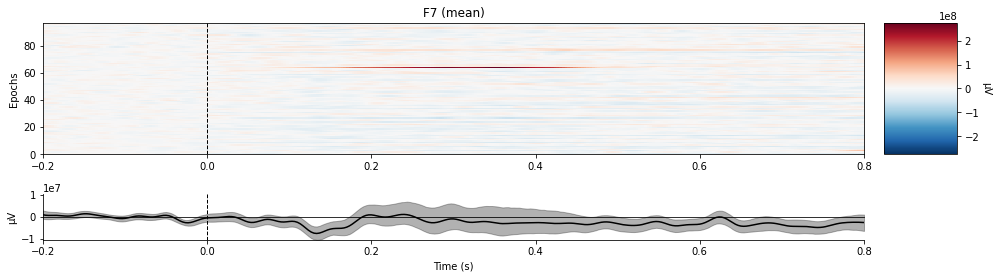

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "F8"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


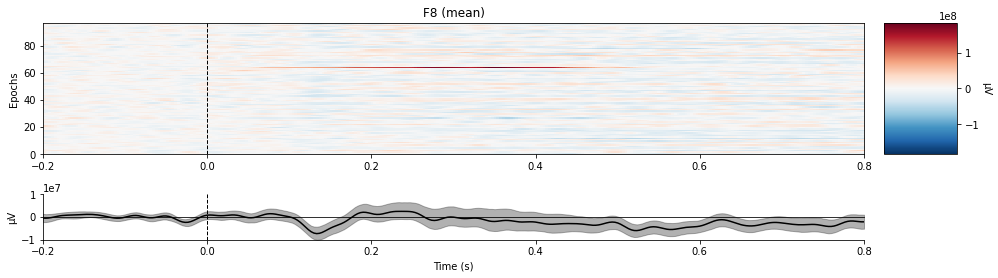

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "M2"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


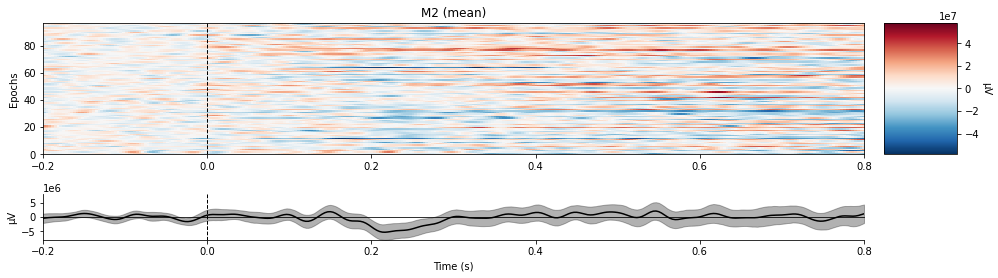

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "T6"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


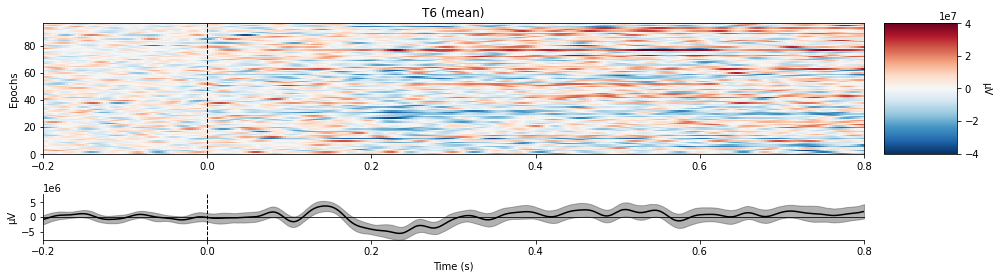

Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only one channel in group "T4"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))
/tmp/ipykernel_563/1614773955.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))


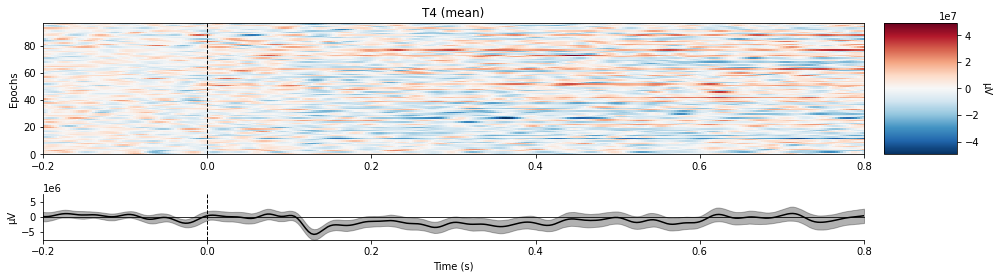

In [49]:
ep_image_plots = []
for i in range(len(channels)):
    ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))

## Frequency Analysis

    Using multitaper spectrum estimation with 7 DPSS windows


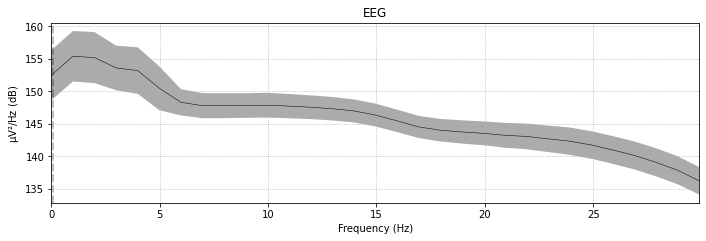

In [99]:
epochs.plot_psd(fmin=0, fmax= 30, average=True, spatial_colors=True);

In [75]:
raw

<RawArray | 20 x 61329 (204.4 s), ~9.4 MB, data loaded>

    Using multitaper spectrum estimation with 7 DPSS windows


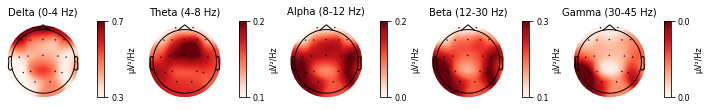

In [98]:
epochs.plot_psd_topomap(normalize=True);

    Using multitaper spectrum estimation with 7 DPSS windows


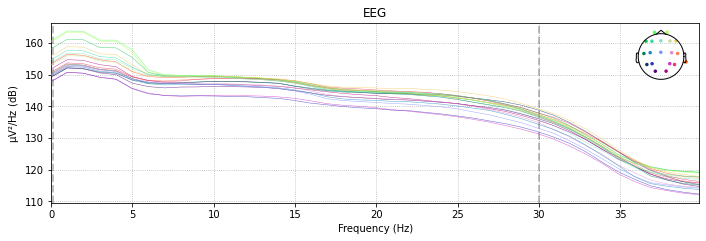

In [97]:
epochs.plot_psd(fmax = 40, picks = 'eeg');

    Using multitaper spectrum estimation with 7 DPSS windows


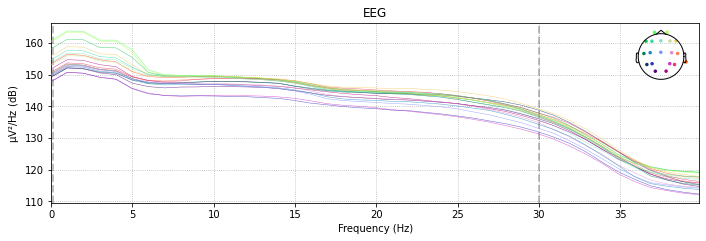

In [96]:
epochs['T'].plot_psd(fmax = 40, picks = 'eeg');

## Generate Evoked data

In [80]:
epochs

<Epochs |  97 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~4.3 MB, data loaded,
 'T': 97>

In [83]:
evoked_averaged = epochs.average(by_event_type = True)
evoked_averaged

[<Evoked | 'T' (average, N=97), -0.2 – 0.8 sec, baseline -0.2 – 0 sec, 19 ch, ~76 kB>]

## Target Evoked plotm

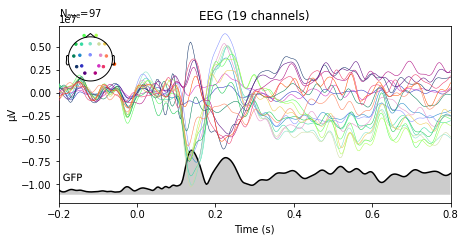

In [103]:
evoked_averaged[0].plot(picks='eeg', spatial_colors=True, gfp=True);

## Topomaps of Evokeds

## Non Target topomaps

## Target topomaps

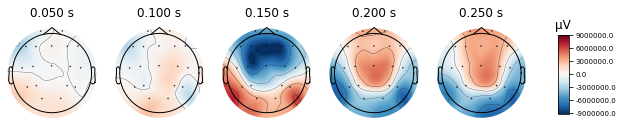

In [104]:
times = np.linspace(0.05, 0.25, 5)
evoked_averaged[0].plot_topomap(ch_type='eeg', times=times, colorbar=True);

## Target Joint plot

No projector specified for this dataset. Please consider the method self.add_proj.


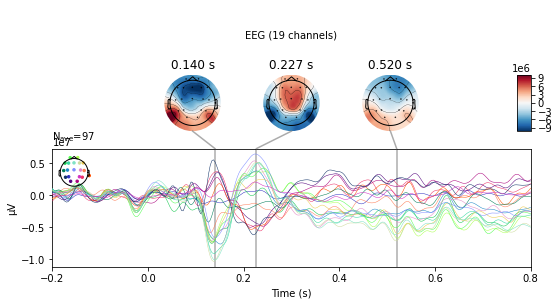

In [105]:
evoked_averaged[0].plot_joint();

## Image plots
## Non Target image plot

## Target image plot

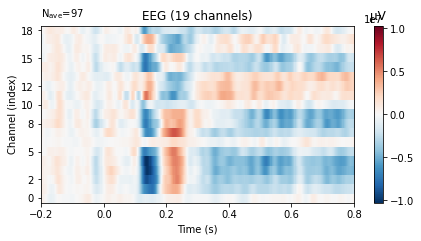

In [92]:
evoked_averaged[0].plot_image(picks='eeg');

## ICA

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 8 components


/tmp/ipykernel_563/2913567373.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 3.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


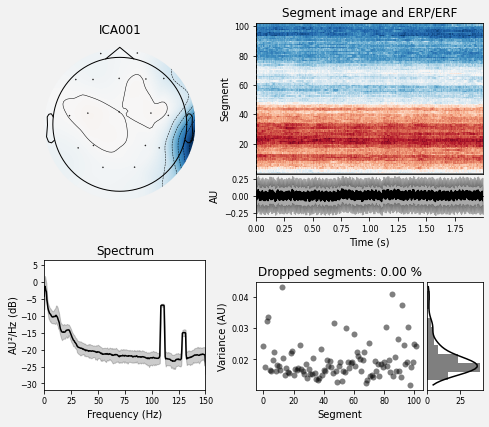

[<Figure size 504x432 with 6 Axes>]

In [106]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 8 components


/tmp/ipykernel_563/2605796746.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 3.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


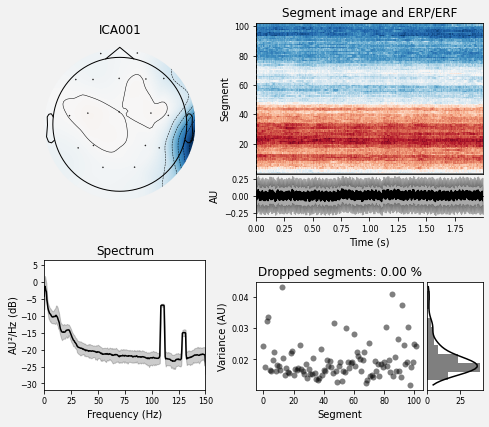

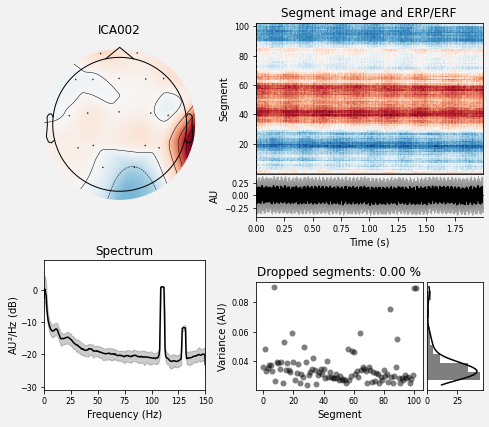

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [107]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1,2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

## ICA

In [117]:
from mne.preprocessing import ICA
ica = ICA(n_components=8, max_iter='auto', random_state=13)
ica.fit(filt_raw)
ica

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 2.3s.


<ICA | raw data decomposition, method: fastica (fit in 90 iterations on 61329 samples), 8 ICA components explaining 89.8 % of variance (19 PCA components available), channel types: eeg, no sources marked for exclusion>

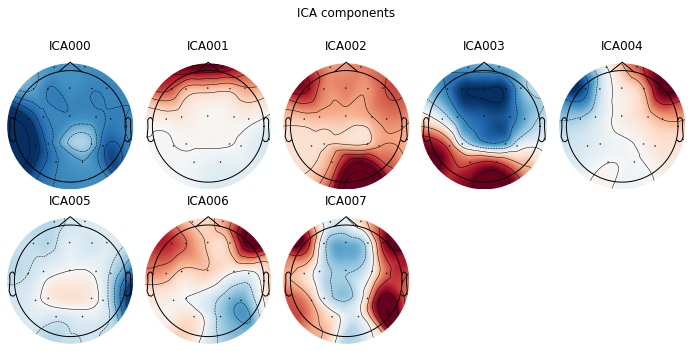

[<MNEFigure size 702x357.12 with 8 Axes>]

In [118]:
ica.plot_components()

Creating RawArray with float64 data, n_channels=8, n_times=61329
    Range : 0 ... 61328 =      0.000 ...   204.427 secs
Ready.
Opening ica-browser...


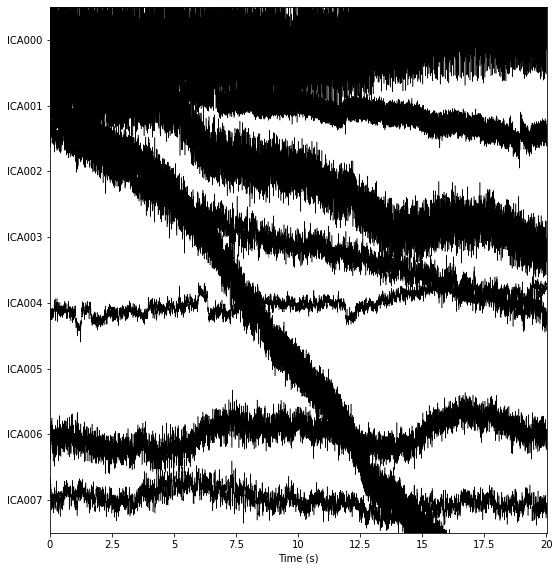

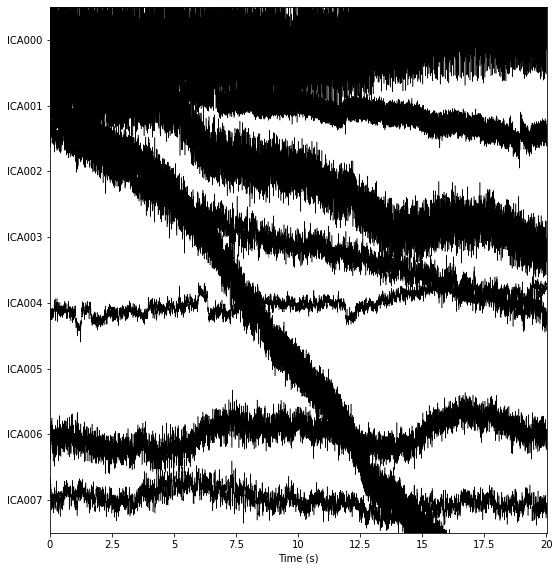

In [119]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components


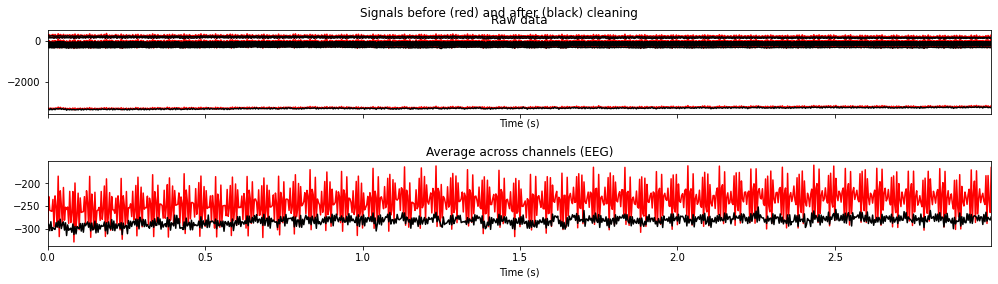

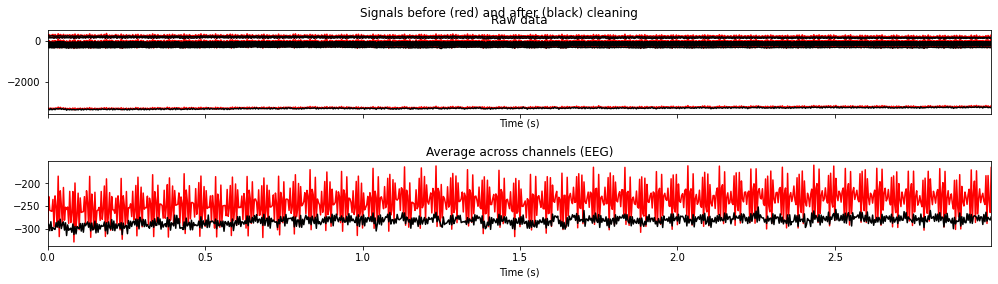

In [120]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
102 matching events fo

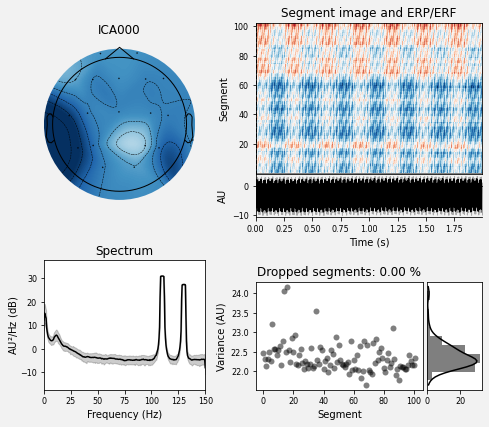

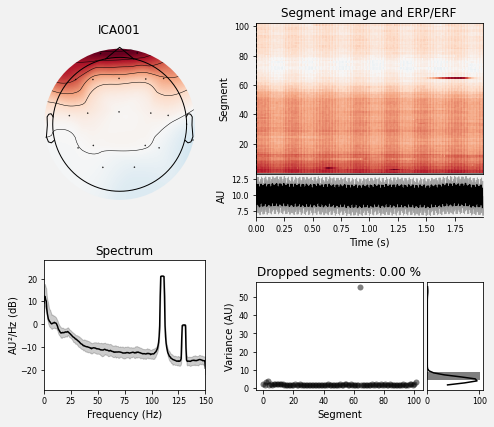

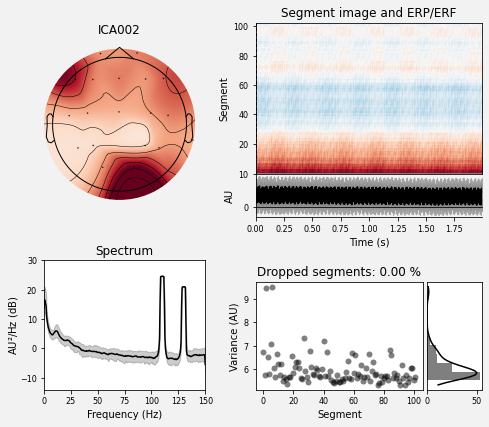

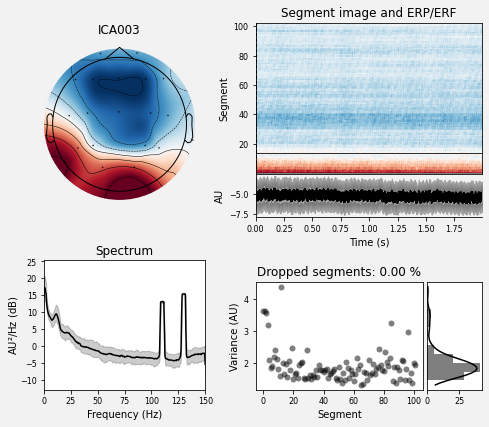

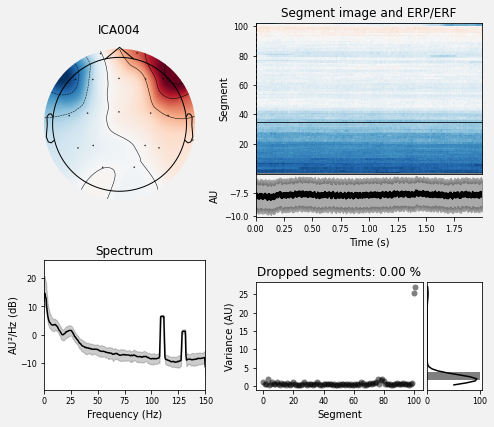

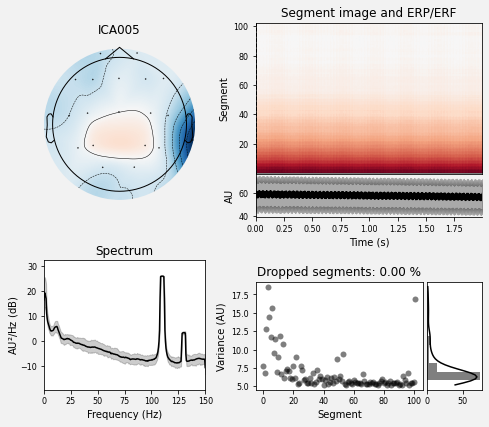

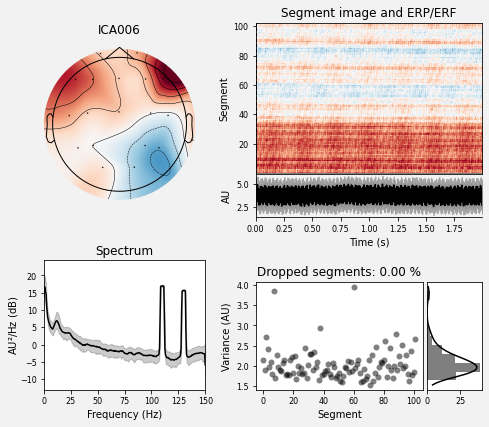

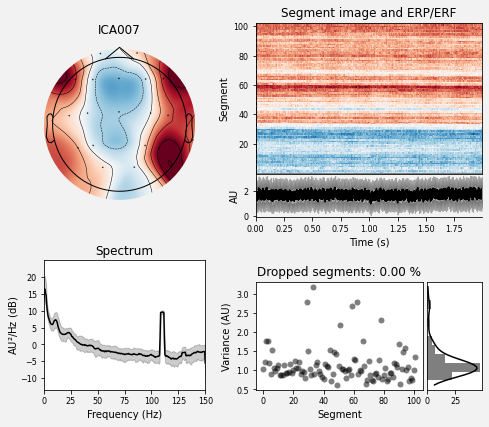

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [121]:
ica.plot_properties(raw, picks=[0, 1, 2, 3, 4, 5, 6, 7])
